In [157]:
import pickle
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#df=pd.read_pickle('./turnstyle_df.zip', compression='zip')
#df.head()

,index,scp_address,station,line_name,date,time,description,entry_cumulative,exit_cumulative,entry_relative,exit_relative
0,0,02-00-00,59 ST,NQR456W,04/08/2017,00:00:00,REGULAR,6127245,2076158,NaN,NaN
1,1,02-00-00,59 ST,NQR456W,04/08/2017,04:00:00,REGULAR,6127285,2076165,40.0,7.0
2,2,02-00-00,59 ST,NQR456W,04/08/2017,08:00:00,REGULAR,6127304,2076196,19.0,31.0
3,3,02-00-00,59 ST,NQR456W,04/08/2017,12:00:00,REGULAR,6127409,2076284,105.0,88.0
4,4,02-00-00,59 ST,NQR456W,04/08/2017,16:00:00,REGULAR,6127654,2076350,245.0,66.0


In [3]:
#df['time'] = pd.to_datetime(df['time'],format = '%H:%M:%S')
#df['date'] = pd.to_datetime(df['date'],format = '%m/%d/%Y')


In [4]:
#df=df.drop(columns = ['entry_relative','exit_relative'])

In [15]:
#df_sample = df.groupby(['station','scp_address','date']).apply(pd.DataFrame.sort_values,'index')
#df_sample=df_sample.drop(columns = ['scp_address','station','line_name'])
#.groupby(['station','scp_address']).diff()


In [24]:
# del df_sample
#df_sample.to_pickle('./grouped_data_by_station_scp_date.zip','zip')
df_sample=pd.read_pickle('./grouped_data_by_station_scp_date.zip',compression = 'zip')

In [ ]:
#df_differences=df_sample.groupby(['station','line_name','scp_address']).diff()
#df_differences.head()

In [ ]:
#df_differences=df_differences.rename(index = str,columns = {'time':'time_delta','entry_cumulative':'entry_relative','exit_cumulative':'exit_relative'})

In [ ]:
# df_outliers=df_differences.loc[(df_differences['time'] != dt.timedelta(days=-1,hours=4)) & (df_differences['time'] != dt.timedelta(hours = 4))]

In [ ]:
# df_outliers.unstack().shape

In [ ]:
#df_outliers.index.tolist()[1][3]
#df_outliers.sample(500)

In [ ]:
#len(df_outliers.index.tolist())
    

In [ ]:
#df_sample.shape
#df_differences.columns
#df_differences.iloc[:,2:5]

In [ ]:
#df_differences['time_delta']

In [ ]:
#df_sample_with_deltas  = df_differences.join(df_sample.set_index('index'), on='index', how='left', lsuffix='_left', rsuffix='_right')
# df_sample_with_deltas = pd.concat([df_sample, df_differences],axis = 0)
#df_sample_with_deltas.reset_index()
#df_sample_with_deltas['entry_relative'] = df_differences.iloc[:,3]
# = df_differences.iloc[:,2]
#df_sample_with_deltas

In [ ]:
#df_sample_with_deltas.shape

In [ ]:

#df_sample_with_deltas.drop(columns = ['date_left','index','time_delta_right'],inplace=True)

In [ ]:
#df_sample_with_deltas = df_sample_with_deltas.rename(index = str, columns = {'time_delta_left' : 'time_delta','date_right':'date'})
#df_sample_with_deltas

In [ ]:
#df_differences.head()

In [ ]:
# df_sample_with_deltas['index']

In [ ]:
#df_outliers_sample=df_sample_with_deltas.loc[(df_sample_with_deltas['time_delta'] != dt.timedelta(days=-1,hours=4)) &\
                                             #(df_sample_with_deltas['time_delta'] != dt.timedelta(hours = 4))]

In [ ]:
#df_outliers_sample.sample(10000)

In [ ]:
#sus_index_num=63000

#range=5
#df_sample_with_deltas.iloc[sus_index_num-range:sus_index_num+range]


In [25]:
#Create 
df_shortcut = df_sample
df_shortcut['entry_relative'] = df_sample['entry_cumulative'].diff()
df_shortcut['exit_relative'] = df_sample['exit_cumulative'].diff()
df_shortcut['time_diff'] = df_sample['time'].diff()

In [27]:
df_shortcut.head(100)

(2179913, 12)

In [28]:
#loc[(df_sample_with_deltas['time_delta'] != dt.timedelta(days=-1,hours=4)) &\
                                             #(df_sample_with_deltas['time_delta'] != dt.timedelta(hours = 4))]

df_shortcut=df_shortcut.loc[(df_shortcut['time_diff'] == dt.timedelta(days=-1,hours=4)) | (df_shortcut['time_diff'] == dt.timedelta(hours = 4))]

In [29]:
df_shortcut['combined'] = df_sample['entry_relative']+df_sample['exit_relative']

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
df_shortcut=df_shortcut.dropna()

df_shortcut=df_shortcut.loc[df_shortcut['exit_relative'] > 0]
df_shortcut=df_shortcut.loc[df_shortcut['entry_relative'] > 0]
df_shortcut.head(10)

index scp_address station line_name  \
station scp_address date                                                      
1 AV    00-00-00    2017-03-18 1224246  29635    00-00-00    1 AV         L   
                               1224247  29636    00-00-00    1 AV         L   
                               1224248  29637    00-00-00    1 AV         L   
                               1224249  29638    00-00-00    1 AV         L   
                               1224250  29639    00-00-00    1 AV         L   
                    2017-03-19 1224251  29640    00-00-00    1 AV         L   
                               1224252  29641    00-00-00    1 AV         L   
                               1224253  29642    00-00-00    1 AV         L   
                               1224254  29643    00-00-00    1 AV         L   
                    2017-03-20 1224257  29646    00-00-00    1 AV         L   

                                             date                time  \
station scp_address date                                                
1 AV    00-00-00    2017-03-18 1224246 2017-03-18 1900-01-01 04:00:00   
                               1224247 2017-03-18 1900-01-01 08:00:00   
                               1224248 2017-03-18 1900-01-01 12:00:00   
                               1224249 2017-03-18 1900-01-01 16:00:00   
                               1224250 2017-03-18 1900-01-01 20:00:00   
                    2017-03-19 1224251 2017-03-19 1900-01-01 00:00:00   
                               1224252 2017-03-19 1900-01-01 04:00:00   
                               1224253 2017-03-19 1900-01-01 08:00:00   
                               1224254 2017-03-19 1900-01-01 12:00:00   
                    2017-03-20 1224257 2017-03-20 1900-01-01 00:00:00   

                                       description  entry_cumulative  \
station scp_address date                                               
1 AV    00-00-00    2017-03-18 1224246     REGULAR          12139967   
                               1224247     REGULAR          12140054   
                               1224248     REGULAR          12140536   
                               1224249     REGULAR          12141295   
                               1224250     REGULAR          12142090   
                    2017-03-19 1224251     REGULAR          12142550   
                               1224252     REGULAR          12142709   
                               1224253     REGULAR          12142781   
                               1224254     REGULAR          12142864   
                    2017-03-20 1224257     REGULAR          12143000   

                                        exit_cumulative  entry_relative  \
station scp_address date                                                  
1 AV    00-00-00    2017-03-18 1224246         13358384           179.0   
                               1224247         13358656            87.0   
                               1224248         13359449           482.0   
                               1224249         13360461           759.0   
                               1224250         13361501           795.0   
                    2017-03-19 1224251         13362297           460.0   
                               1224252         13362585           159.0   
                               1224253         13362802            72.0   
                               1224254         13363357            83.0   
                    2017-03-20 1224257         13365489           136.0   

                                        exit_relative         time_diff  \
station scp_address date                                                  
1 AV    00-00-00    2017-03-18 1224246          301.0          04:00:00   
                               1224247          272.0          04:00:00   
                               1224248          793.0          04:00:00   
                               1224249         1012.0          04:00:00  

In [45]:
df_shortcut['combined'].describe()

count    1.587369e+06
mean     3.834212e+02
std      4.010068e+02
min      2.000000e+00
25%      8.600000e+01
50%      2.570000e+02
75%      5.490000e+02
max      4.949000e+03
Name: combined, dtype: float64

In [46]:
outlier = 5000
df_shortcut=df_shortcut.loc[df_shortcut['combined'] < outlier]
print(df_shortcut['combined'].describe())
new_out = (df_shortcut['combined'].mean() + (df_shortcut['combined'].std())*3)
print(new_out)

count    1.587369e+06
mean     3.834212e+02
std      4.010068e+02
min      2.000000e+00
25%      8.600000e+01
50%      2.570000e+02
75%      5.490000e+02
max      4.949000e+03
Name: combined, dtype: float64
1586.4414404447436


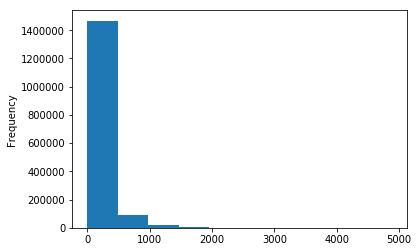

In [47]:
df_shortcut['exit_relative'].plot.hist()

(array([6.09859e+05, 2.72910e+05, 1.72198e+05, 1.18571e+05, 8.46930e+04,
        6.33460e+04, 5.05890e+04, 3.98000e+04, 3.11160e+04, 2.45020e+04,
        1.89480e+04, 1.58550e+04, 1.28000e+04, 1.05430e+04, 8.93300e+03,
        7.09100e+03, 6.07700e+03, 5.32300e+03, 4.52900e+03, 3.82600e+03,
        3.35300e+03, 2.82900e+03, 2.46700e+03, 2.15200e+03, 1.82400e+03,
        1.47700e+03, 1.33700e+03, 1.22400e+03, 1.06700e+03, 9.08000e+02,
        7.42000e+02, 6.50000e+02, 5.87000e+02, 5.63000e+02, 4.93000e+02,
        4.42000e+02, 3.91000e+02, 3.49000e+02, 2.95000e+02, 2.84000e+02,
        2.17000e+02, 2.11000e+02, 1.95000e+02, 1.91000e+02, 1.68000e+02,
        1.58000e+02, 1.37000e+02, 1.15000e+02, 1.10000e+02, 1.06000e+02,
        6.90000e+01, 8.10000e+01, 6.30000e+01, 5.70000e+01, 5.60000e+01,
        4.00000e+01, 4.30000e+01, 3.70000e+01, 3.20000e+01, 3.50000e+01,
        2.40000e+01, 2.20000e+01, 2.80000e+01, 1.30000e+01, 1.90000e+01,
        1.70000e+01, 1.50000e+01, 1.90000e+01, 9.00

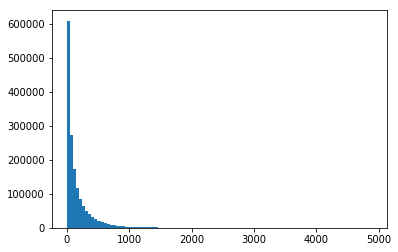

In [48]:
plt.hist(df_shortcut['exit_relative'], bins = 100)

In [49]:
df_shortcut.sort_values('combined', ascending = False)

index scp_address  \
station         scp_address date                                     
42 ST-PORT AUTH 00-00-00    2017-03-22 1244493   49882    00-00-00   
                            2017-03-28 250931    49734    00-00-00   
                            2018-04-03 1441122   49794    00-00-00   
GRD CNTRL-42 ST 00-06-00    2017-04-05 1937519  152612    00-06-00   
42 ST-PORT AUTH 00-00-00    2019-02-20 1042447   51891    00-00-00   
                            2017-04-04 1834423   49516    00-00-00   
                00-00-01    2017-03-31 250991    49794    00-00-01   
                00-00-00    2017-04-03 1834417   49510    00-00-00   
GRD CNTRL-42 ST 00-03-01    2017-04-21 2134764  152212    00-03-01   
149/GRAND CONC  00-00-00    2018-03-20 559654   160089    00-00-00   
GRD CNTRL-42 ST 00-06-00    2017-04-06 1937525  152618    00-06-00   
42 ST-PORT AUTH 00-00-00    2017-03-27 250925    49728    00-00-00   
25 AV           00-00-02    2017-04-20 2009871   27319    00-00-02   
42 ST-PORT AUTH 00-00-00    2018-03-20 449571    50006    00-00-00   
                            2017-04-19 2032493   49941    00-00-00   
GRD CNTRL-42 ST 00-06-00    2017-04-04 1937513  152606    00-06-00   
42 ST-PORT AUTH 00-00-00    2018-04-17 842918    49550    00-00-00   
                            2018-04-04 1441128   49800    00-00-00   
GRD CNTRL-42 ST 00-03-00    2017-04-21 2134737  152185    00-03-00   
42 ST-PORT AUTH 00-00-01    2017-04-06 1834478   49571    00-00-01   
                00-00-00    2017-03-23 1244499   49888    00-00-00   
GRD CNTRL-42 ST 00-06-02    2019-02-19 1148975  158419    00-06-02   
                00-06-00    2017-03-30 354175   152978    00-06-00   
                00-06-02    2019-02-20 1148981  158425    00-06-02   
42 ST-PORT AUTH 00-00-00    2019-02-19 1042441   51885    00-00-00   
                            2017-04-20 2032499   49947    00-00-00   
GRD CNTRL-42 ST 00-06-00    2018-03-20 552123   152558    00-06-00   
                00-06-02    2019-02-21 1148987  158431    00-06-02   
42 ST-PORT AUTH 00-00-00    2017-04-05 1834429   49522    00-00-00   
                            2018-04-09 1637883   49567    00-00-00   
...                                                ...         ...   
5 AV/59 ST      00-00-02    2018-04-20 793993      625    00-00-02   
FLATBUSH AV-B.C 02-06-00    2017-04-17 2177329  194777    02-06-00   
75 AV           00-00-01    2017-04-13 87206     87206    00-00-01   
CORTLANDT ST    00-03-03    2018-03-26 605711     8997    00-03-03   
WTC-CORTLANDT   02-00-02    2019-02-16 1119663  129107    02-00-02   
75 AV           00-00-01    2017-04-08 87176     87176    00-00-01   
86 ST           00-06-00    2018-03-23 445466    45901    00-06-00   
68ST-HUNTER CO  00-00-06    2017-04-14 159973   159973    00-00-06   
75 AV           00-00-01    2017-04-09 87182     87182    00-00-01   
                                       87183     87183    00-00-01   
86 ST           00-06-00    2018-03-17 445430    45865    00-06-00   
68ST-HUNTER CO  00-00-06    2017-04-09 159943   159943    00-00-06   
                            2017-04-08 159937   159937    00-00-06   
CORTLANDT ST    00-03-03    2018-04-04 1400387    9059    00-03-03   
75 AV           00-00-01    2017-04-11 87193     87193    00-00-01   
                            2017-04-13 87207     87207    00-00-01   
34 ST-HUDSON YD 01-03-06    2019-02-21 1182538  191982    01-03-06   
5 AV/59 ST      00-00-02    2019-02-17 991151      595    00-00-02   
FLATBUSH AV-B.C 02-06-00    2018-03-31 1585828  194500    02-06-00   
75 AV           00-00-01    2017-04-14 87212     87212    00-00-01   
CORTLANDT ST    00-03-03    2018-04-14 802373     9005    00-03-03   
GRD CNTRL-42 ST 02-00-01    2018-03-27 749022   152308    02-00-01   
68ST-HUNTER CO  00-00-06    2017-03-27 358006   156809    00-00-06   
2 AV            01-06-02    2017-04-14 101570   101570    01-06-02   
                            2017-04-15 2080094   97542    0

In [50]:
df_shortcut['day_of_week']=df_shortcut['date'].dt.day_name()

In [51]:
#df_shortcut.shape

In [52]:
#df_shortcut['exit_relative']
df_shortcut2=df_shortcut.drop(columns =['station'])

In [53]:
df_shortcut2=df_shortcut2.groupby(['station', 'day_of_week', 'time']).sum()
df_shortcut2

index  entry_cumulative  \
station   day_of_week time                                             
1 AV      Friday      1900-01-01 00:00:00  3042446       22264597294   
                      1900-01-01 03:00:00   281307        1405977005   
                      1900-01-01 04:00:00  2981900       22256498738   
                      1900-01-01 07:00:00   312552        1412269558   
                      1900-01-01 08:00:00  3042646       22264618294   
                      1900-01-01 11:00:00   312562        1412274217   
                      1900-01-01 12:00:00  2924827       21830269032   
                      1900-01-01 15:00:00   312572        1412277379   
                      1900-01-01 16:00:00  2923411       22199157562   
                      1900-01-01 19:00:00   312582        1412283160   
                      1900-01-01 20:00:00  2952925       22256273619   
                      1900-01-01 23:00:00   312592        1412287829   
          Monday      1900-01-01 00:00:00  3040041       22263727423   
                      1900-01-01 03:00:00    62716         955668329   
                      1900-01-01 04:00:00  2980118       22252300107   
                      1900-01-01 07:00:00    31380         955219012   
                      1900-01-01 08:00:00  3040241       22263746888   
                      1900-01-01 11:00:00    94017         958342418   
                      1900-01-01 12:00:00  3040341       22263796568   
                      1900-01-01 15:00:00    94020         958342427   
                      1900-01-01 16:00:00  3040441       22263840749   
                      1900-01-01 19:00:00    62724         955668365   
                      1900-01-01 20:00:00  3040541       22263904454   
                      1900-01-01 23:00:00    62726         955668388   
          Saturday    1900-01-01 00:00:00  2436781       17811299903   
                      1900-01-01 04:00:00  3038941       22263426228   
                      1900-01-01 07:00:00    94020        2585126476   
                      1900-01-01 08:00:00  3039041       22263431665   
                      1900-01-01 11:00:00    31327            449316   
                      1900-01-01 12:00:00  3039141       22263458226   
...                                            ...               ...   
ZEREGA AV Thursday    1900-01-01 12:00:00   715076           1656959   
                      1900-01-01 13:00:00  6949472         542075815   
                      1900-01-01 16:00:00   715080           1657419   
                      1900-01-01 17:00:00  6949512         542081464   
                      1900-01-01 20:00:00   715084           1657886   
                      1900-01-01 21:00:00  6949552         542084890   
          Tuesday     1900-01-01 00:00:00   715016           1650666   
                      1900-01-01 01:00:00  6948872         542005950   
                      1900-01-01 04:00:00   715020           1650690   
                      1900-01-01 05:00:00  6948912         542006547   
                      1900-01-01 08:00:00   715024           1651428   
                      1900-01-01 09:00:00  6948952         542017986   
                      1900-01-01 12:00:00   715028           1652116   
                      1900-01-01 13:00:00  6948992         542022709   
                      1900-01-01 16:00:00   715032           1652591   
                      1900-01-01 17:00:00  6949032         542028295   
                      1900-01-01 20:00:00   715036           1653035   
                      1900-01-01 21:00:00  6949072         542031610   
          Wednesday   1900-01-01 00:00:00   715040           1653120   
                      1900-01-01 01:00:00  6949112         542032370   
                      1900-01-01 04:00:00   715044           1653144   
                      1900-01-01 05:00:00  6775407         542008230   
                      1900-01-01 08:00:00   715048           1653880   
             

In [54]:
df_shortcut2=df_shortcut2.groupby(['station','day_of_week','time']).mean().sort_values(['combined'], ascending=False)
df3=df_shortcut2.reset_index()
df3

,station,day_of_week,time,index,entry_cumulative,exit_cumulative,entry_relative,exit_relative,combined
0,34 ST-HERALD SQ,Thursday,1900-01-01 20:00:00,34162942,15817892736,13326950120,503927.0,318379.0,822306.0
1,34 ST-HERALD SQ,Tuesday,1900-01-01 20:00:00,34149341,15748701337,13366459702,497384.0,311206.0,808590.0
2,34 ST-HERALD SQ,Friday,1900-01-01 20:00:00,33881247,15883978192,13356498773,468687.0,320615.0,789302.0
3,34 ST-HERALD SQ,Monday,1900-01-01 20:00:00,34332229,15742718501,13346849185,483383.0,300141.0,783524.0
4,34 ST-HERALD SQ,Wednesday,1900-01-01 20:00:00,34345962,15812581287,13366046609,477141.0,301405.0,778546.0
5,34 ST-PENN STA,Tuesday,1900-01-01 20:00:00,54044701,10829608423,10322720131,332093.0,436921.0,769014.0
6,34 ST-PENN STA,Thursday,1900-01-01 20:00:00,52024369,10634163346,10166994438,321565.0,413484.0,735049.0
7,34 ST-PENN STA,Monday,1900-01-01 20:00:00,53803327,10814650334,10312269363,318271.0,411492.0,729763.0
8,34 ST-PENN STA,Wednesday,1900-01-01 20:00:00,53118276,10776586229,10241417943,318952.0,392605.0,711557.0
9,34 ST-PENN STA,Friday,1900-01-01 20:00:00,52105253,9364809422,8789727544,303731.0,381385.0,685116.0


In [55]:

df3['string_index']= df3['station'] + " " + df3['day_of_week'].map(str) + " "+ df3['time'].astype(str).str[-8:]
df3

,station,day_of_week,time,index,entry_cumulative,exit_cumulative,entry_relative,exit_relative,combined,string_index
0,34 ST-HERALD SQ,Thursday,1900-01-01 20:00:00,34162942,15817892736,13326950120,503927.0,318379.0,822306.0,34 ST-HERALD SQ Thursday 20:00:00
1,34 ST-HERALD SQ,Tuesday,1900-01-01 20:00:00,34149341,15748701337,13366459702,497384.0,311206.0,808590.0,34 ST-HERALD SQ Tuesday 20:00:00
2,34 ST-HERALD SQ,Friday,1900-01-01 20:00:00,33881247,15883978192,13356498773,468687.0,320615.0,789302.0,34 ST-HERALD SQ Friday 20:00:00
3,34 ST-HERALD SQ,Monday,1900-01-01 20:00:00,34332229,15742718501,13346849185,483383.0,300141.0,783524.0,34 ST-HERALD SQ Monday 20:00:00
4,34 ST-HERALD SQ,Wednesday,1900-01-01 20:00:00,34345962,15812581287,13366046609,477141.0,301405.0,778546.0,34 ST-HERALD SQ Wednesday 20:00:00
5,34 ST-PENN STA,Tuesday,1900-01-01 20:00:00,54044701,10829608423,10322720131,332093.0,436921.0,769014.0,34 ST-PENN STA Tuesday 20:00:00
6,34 ST-PENN STA,Thursday,1900-01-01 20:00:00,52024369,10634163346,10166994438,321565.0,413484.0,735049.0,34 ST-PENN STA Thursday 20:00:00
7,34 ST-PENN STA,Monday,1900-01-01 20:00:00,53803327,10814650334,10312269363,318271.0,411492.0,729763.0,34 ST-PENN STA Monday 20:00:00
8,34 ST-PENN STA,Wednesday,1900-01-01 20:00:00,53118276,10776586229,10241417943,318952.0,392605.0,711557.0,34 ST-PENN STA Wednesday 20:00:00
9,34 ST-PENN STA,Friday,1900-01-01 20:00:00,52105253,9364809422,8789727544,303731.0,381385.0,685116.0,34 ST-PENN STA Friday 20:00:00


[Text(0, 0.5, 'Station'),
 Text(0.5, 0, 'People per 4 Hour Time Frame'),
 Text(0.5, 1.0, 'Stations with Most Throughput')]

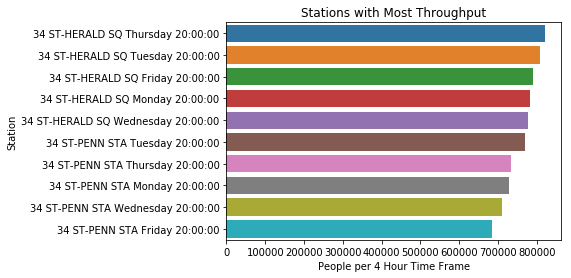

In [59]:
fig_max_throughput=sns.barplot(y = 'string_index',
            x = 'combined', data=df3[:10],orient='h')
fig_max_throughput.set(title = 'Stations with Most Throughput' , xlabel = 'People per 4 Hour Time Frame',ylabel = 'Station')

In [ ]:
df3.describe()


In [62]:
df3_weekends = df3.loc[(df3['day_of_week'] == 'Saturday') | (df3['day_of_week'] == 'Sunday')]

df3_weekends=df3_weekends.groupby(['station','day_of_week','time']).mean().sort_values(['combined'], ascending=False).reset_index()


In [65]:

df3_weekends['string_index']= df3_weekends['station'] + " " + df3_weekends['day_of_week'].map(str) + " "+ df3_weekends['time'].astype(str).str[-8:]
df3_weekends

,station,day_of_week,time,index,entry_cumulative,exit_cumulative,entry_relative,exit_relative,combined,string_index
0,14 ST-UNION SQ,Saturday,1900-01-01 17:00:00,16119560,8797412805,2817495108,233427.0,219302.0,452729.0,14 ST-UNION SQ Saturday 17:00:00
1,34 ST-HERALD SQ,Saturday,1900-01-01 20:00:00,34719712,15910825918,13397462481,234167.0,180784.0,414951.0,34 ST-HERALD SQ Saturday 20:00:00
2,14 ST-UNION SQ,Saturday,1900-01-01 21:00:00,16130183,8804602261,2832668669,240400.0,167732.0,408132.0,14 ST-UNION SQ Saturday 21:00:00
3,TIMES SQ-42 ST,Saturday,1900-01-01 20:00:00,51438536,38767690777,17681393804,203746.0,203932.0,407678.0,TIMES SQ-42 ST Saturday 20:00:00
4,34 ST-HERALD SQ,Saturday,1900-01-01 16:00:00,34062150,15886253359,13377168427,179785.0,183326.0,363111.0,34 ST-HERALD SQ Saturday 16:00:00
5,34 ST-PENN STA,Saturday,1900-01-01 20:00:00,48148870,9281821786,8711698943,173749.0,170769.0,344518.0,34 ST-PENN STA Saturday 20:00:00
6,14 ST-UNION SQ,Sunday,1900-01-01 17:00:00,15984236,8686219543,2829875154,173922.0,169579.0,343501.0,14 ST-UNION SQ Sunday 17:00:00
7,TIMES SQ-42 ST,Saturday,1900-01-01 16:00:00,51570253,38819464575,17681723063,135654.0,200112.0,335766.0,TIMES SQ-42 ST Saturday 16:00:00
8,34 ST-PENN STA,Saturday,1900-01-01 16:00:00,48852500,9326371707,8786902967,159185.0,162057.0,321242.0,34 ST-PENN STA Saturday 16:00:00
9,34 ST-HERALD SQ,Sunday,1900-01-01 20:00:00,34432416,15894856672,13381518593,182069.0,134573.0,316642.0,34 ST-HERALD SQ Sunday 20:00:00


[Text(0, 0.5, 'Station'),
 Text(0.5, 0, 'People per 4 Hour Time Frame'),
 Text(0.5, 1.0, 'Stations with Most Throughput on Weekends')]

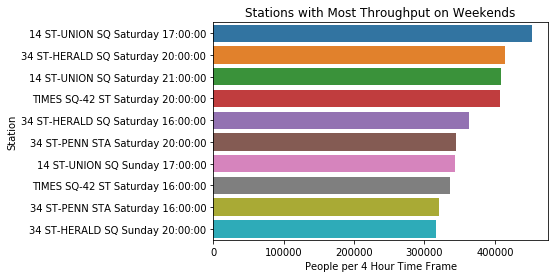

In [66]:
fig_max_throughput_weekends=sns.barplot(y = 'string_index',
            x = 'combined', data=df3_weekends[:10],orient='h')
fig_max_throughput_weekends.set(title = 'Stations with Most Throughput on Weekends' , xlabel = 'People per 4 Hour Time Frame',ylabel = 'Station')

In [124]:
df3

,station,day_of_week,time,index,entry_cumulative,exit_cumulative,entry_relative,exit_relative,combined,string_index
0,34 ST-HERALD SQ,Thursday,1900-01-01 20:00:00,34162942,15817892736,13326950120,503927.0,318379.0,822306.0,34 ST-HERALD SQ Thursday 20:00:00
1,34 ST-HERALD SQ,Tuesday,1900-01-01 20:00:00,34149341,15748701337,13366459702,497384.0,311206.0,808590.0,34 ST-HERALD SQ Tuesday 20:00:00
2,34 ST-HERALD SQ,Friday,1900-01-01 20:00:00,33881247,15883978192,13356498773,468687.0,320615.0,789302.0,34 ST-HERALD SQ Friday 20:00:00
3,34 ST-HERALD SQ,Monday,1900-01-01 20:00:00,34332229,15742718501,13346849185,483383.0,300141.0,783524.0,34 ST-HERALD SQ Monday 20:00:00
4,34 ST-HERALD SQ,Wednesday,1900-01-01 20:00:00,34345962,15812581287,13366046609,477141.0,301405.0,778546.0,34 ST-HERALD SQ Wednesday 20:00:00
5,34 ST-PENN STA,Tuesday,1900-01-01 20:00:00,54044701,10829608423,10322720131,332093.0,436921.0,769014.0,34 ST-PENN STA Tuesday 20:00:00
6,34 ST-PENN STA,Thursday,1900-01-01 20:00:00,52024369,10634163346,10166994438,321565.0,413484.0,735049.0,34 ST-PENN STA Thursday 20:00:00
7,34 ST-PENN STA,Monday,1900-01-01 20:00:00,53803327,10814650334,10312269363,318271.0,411492.0,729763.0,34 ST-PENN STA Monday 20:00:00
8,34 ST-PENN STA,Wednesday,1900-01-01 20:00:00,53118276,10776586229,10241417943,318952.0,392605.0,711557.0,34 ST-PENN STA Wednesday 20:00:00
9,34 ST-PENN STA,Friday,1900-01-01 20:00:00,52105253,9364809422,8789727544,303731.0,381385.0,685116.0,34 ST-PENN STA Friday 20:00:00


In [125]:
df3.loc[(df3['station']=='21 ST') & (df3['time'].dt.strftime('%H')== '20')]

women_in_tech_conf_row=df3.iloc[23676]

In [127]:
def station_weekday_lookup(input_station):
    return df3.loc[(df3['station'].str.contains(input_station)) \
    & ((df3['time'].dt.strftime('%H')== '11')\
       | (df3['time'].dt.strftime('%H')== '12'))\
    & ((df3['day_of_week'] != 'Saturday'))\
       & ((df3['day_of_week'] != 'Sunday'))].groupby('day_of_week').mean()['combined']
    
    

In [148]:
new_york_uni = station_weekday_lookup('W 4 ST').mean()
borough_cc = station_weekday_lookup('FRANKLIN ST').mean()
sheepshead = station_weekday_lookup('SHEEP').mean()
sheepshead_num_students = 24857
new_york_uni_num = 57015
borough_num_students = 31482
# student per commuter factor: num students for one school / num people thru subway
# normalize dividing by studnet per commuter for all colleges
# roughly the smae number of students per college use the subway
# should divide by people working in the area
# didn't specify top colleges because we awnt general
nyc_city_college_num_students = 20648
nyc_city_college = nyc

In [339]:
def rows_lookup(input_string):
    return df3.loc[(df3['station'].str.contains(input_string)) ]
def rows_lookup_exact(input_string):
    return df3.loc[(df3['station']==(input_string))]

    
rows_lookup('72 ST-2')
rows_lookup_exact('77 ST').groupby(['day_of_week','time']).mean().sort_values('combined',ascending = False).head()

,,index,entry_cumulative,exit_cumulative,entry_relative,exit_relative,combined
day_of_week,time,,,,,,
Thursday,1900-01-01 17:00:00,23580189,2455251906,911122872,87395.0,55245.0,142640.0
Friday,1900-01-01 17:00:00,23424905,2448659269,886076254,85595.0,56664.0,142259.0
Wednesday,1900-01-01 17:00:00,23579281,2454982846,910857947,86683.0,55473.0,142156.0
Tuesday,1900-01-01 17:00:00,23578381,2454715127,910597914,86572.0,54182.0,140754.0
Thursday,1900-01-01 21:00:00,23580339,2455327676,911181710,75770.0,58838.0,134608.0


In [337]:
rows_lookup('86 ST-2').groupby(['day_of_week','time']).mean().sort_values('combined',ascending = False).head()

,,index,entry_cumulative,exit_cumulative,entry_relative,exit_relative,combined
day_of_week,time,,,,,,
Tuesday,1900-01-01 21:00:00,14100310,56518260,40743391,48651.0,72613.0,121264.0
Thursday,1900-01-01 21:00:00,14102149,57010730,41092250,51767.0,68505.0,120272.0
Friday,1900-01-01 21:00:00,14102923,57256203,41263355,55728.0,60686.0,116414.0
Wednesday,1900-01-01 21:00:00,14101336,54747059,40063214,47869.0,67422.0,115291.0
Monday,1900-01-01 21:00:00,14099536,56272062,40570975,44779.0,70483.0,115262.0


In [ ]:
nyc_city_college_station145=df3.loc[(df3['station'].str.contains('145')) \
        & ((df3['time'].dt.strftime('%H')== '11')\
           | (df3['time'].dt.strftime('%H')== '12'))\
        & ((df3['day_of_week'] != 'Saturday'))\
           & ((df3['day_of_week'] != 'Sunday'))].groupby('day_of_week').mean()['combined']
           
nyc_city_college_station145

4
4


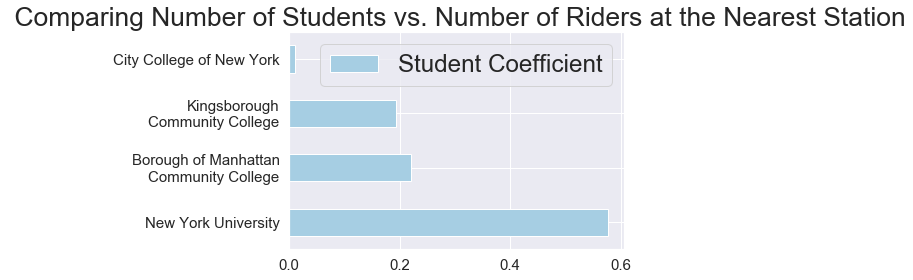

In [276]:
new_york_uni_coeff =  new_york_uni_num / new_york_uni
borough_cc_coeff =  borough_num_students / borough_cc
sheepshead_coeff = sheepshead_num_students / sheepshead
nyc_city_college_coeff= nyc_city_college_num_students / nyc_city_college_station145.mean()
not_normalized_coeff = np.array([new_york_uni_coeff,borough_cc_coeff,sheepshead_coeff,nyc_city_college_coeff])
name_of_university = ['New York University','Borough of Manhattan\nCommunity College',\
                      'Kingsborough\nCommunity College','City College of New York']
coeff_normalizing_sum = sum(not_normalized_coeff)
normalized_coeffs=not_normalized_coeff / coeff_normalizing_sum
print(len(name_of_university))
print(len(normalized_coeffs))
student_coefficient = pd.DataFrame(normalized_coeffs,columns = ["Student Coefficient"]).sort_values(by='Student Coefficient',ascending = False)
student_coefficient.index =name_of_university

fig = plt.figure
fig.title_fontsize = 10
student_coefficient.plot(kind='barh', \
                         title = ''' Comparing Number of Students vs. Number of Riders at the Nearest Station''',\
                         fontsize = 15,
                         stacked = True,
                         colormap = 'Paired')



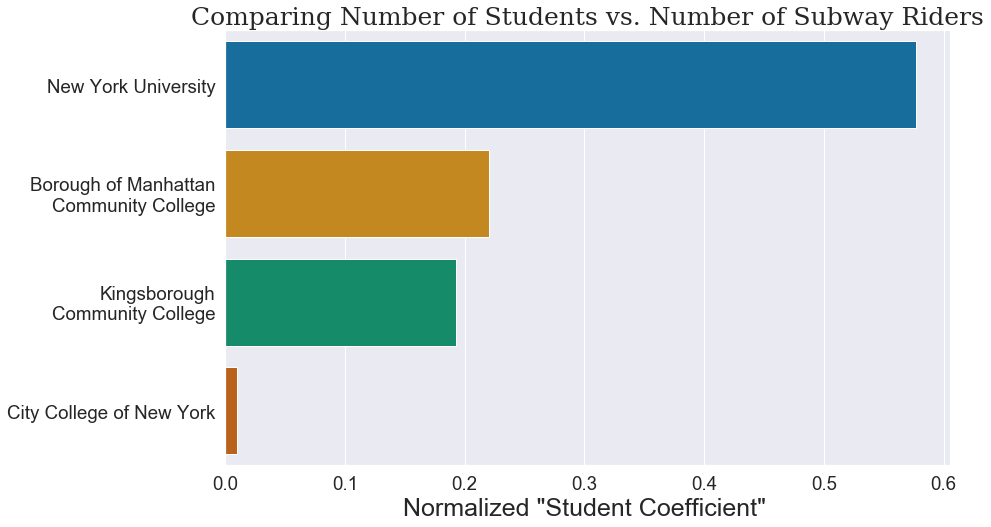

In [297]:
plt.figure(figsize=(13,8))

sns.set(font_scale = 1.7)
fig_students_vs_subway_riders = sns.barplot(y= 'index',x = 'Student Coefficient',\
            data = student_coefficient.reset_index(),orient = 'h', label = 'big',\
            palette = sns.color_palette("colorblind", 5))
#fig_students_vs_subway_riders.set(title = 'Comparing Number of Students vs. Number of Subway Riders',\
 #                                ylabel = '')

plt.title('Comparing Number of Students vs. Number of Subway Riders', family='serif',fontsize = 25,loc='center',)
plt.ylabel('',fontsize = 2)
plt.xlabel('''Normalized "Student Coefficient" ''',fontsize = 25)
export_fig = fig_students_vs_subway_riders.get_figure()
export_fig.savefig("./export_fig.png", format =  "png",bbox_inches = 'tight')

In [151]:
# df3.loc[(df3['station'].str.contains('SHEEP'))]

In [77]:
df3['station'].nunique()

360

In [ ]:
df3['station']